In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# use seaborn plotting defaults
import seaborn as sns; sns.set()

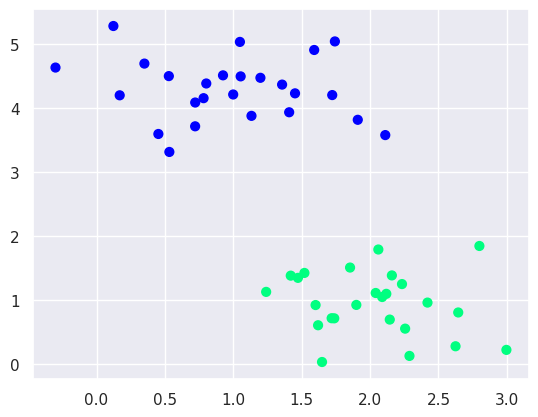

In [11]:
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.50)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='winter')
plt.show()

In [12]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
model.fit(X, y)

SVC(C=1, kernel='linear')

In [13]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors=['r','g','b'],
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'],linewidth = 0.9)

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

<ipython-input-13-3f3f25358eae>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors=['r','g','b'],


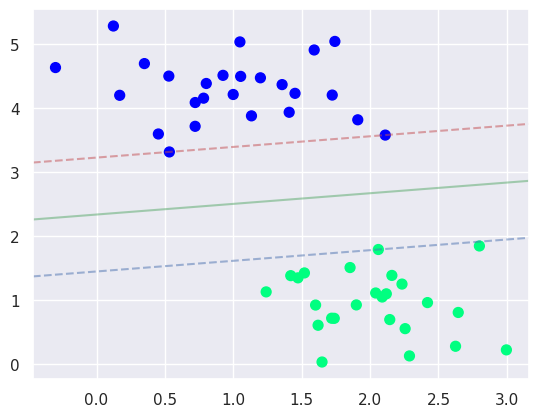

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

<ipython-input-13-3f3f25358eae>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors=['r','g','b'],
<ipython-input-13-3f3f25358eae>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors=['r','g','b'],


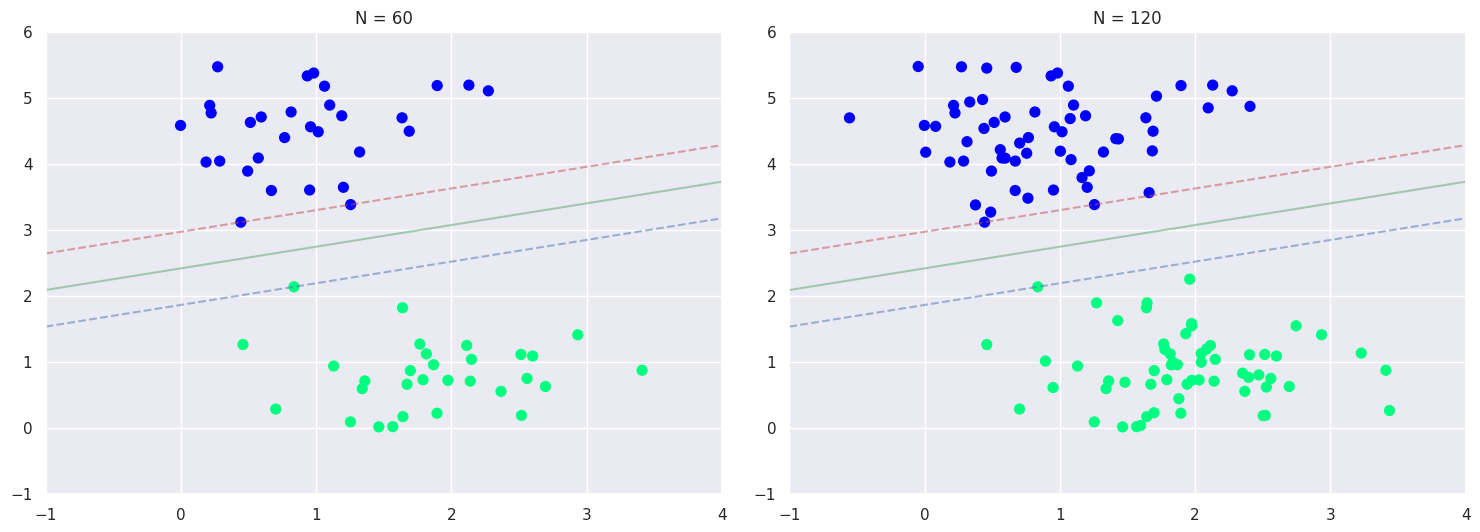

In [15]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

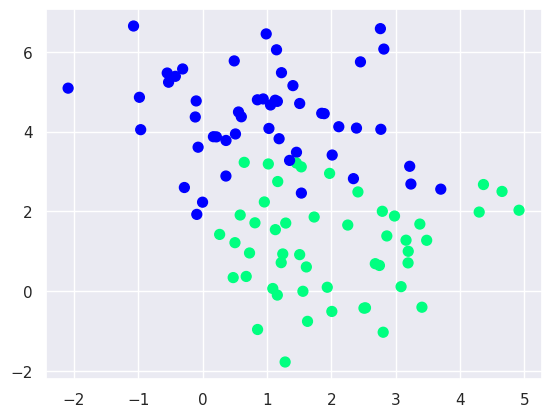

In [7]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

<ipython-input-4-3f3f25358eae>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors=['r','g','b'],
<ipython-input-4-3f3f25358eae>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(X, Y, P, colors=['r','g','b'],


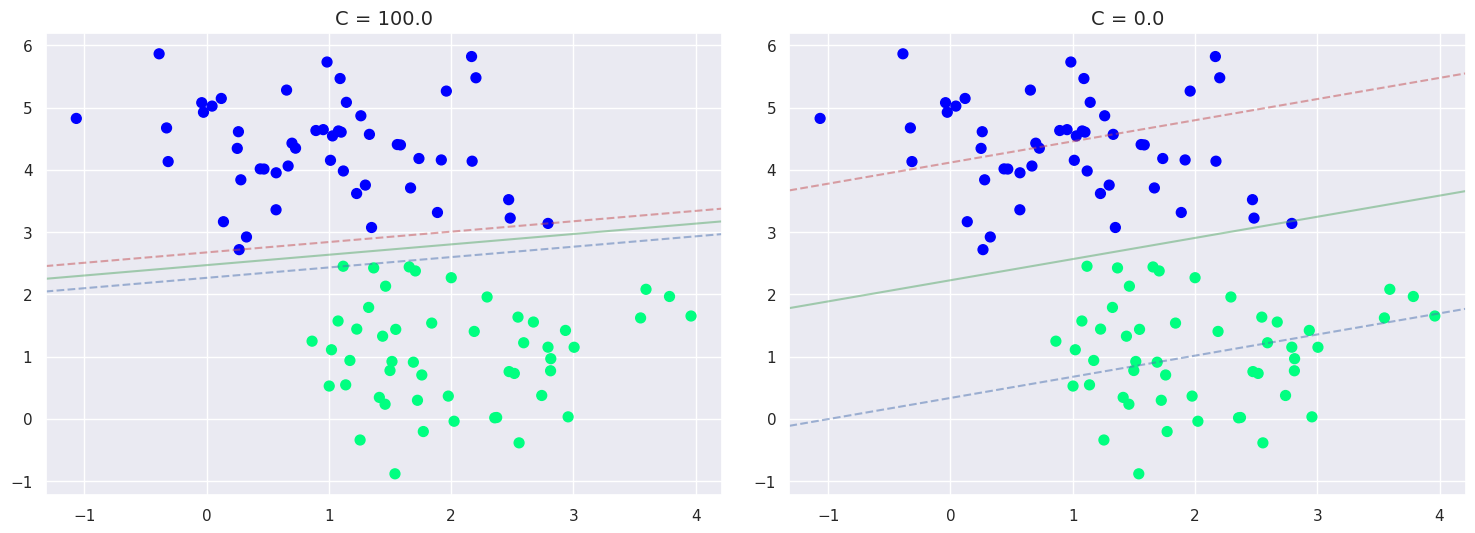

In [8]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.01]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

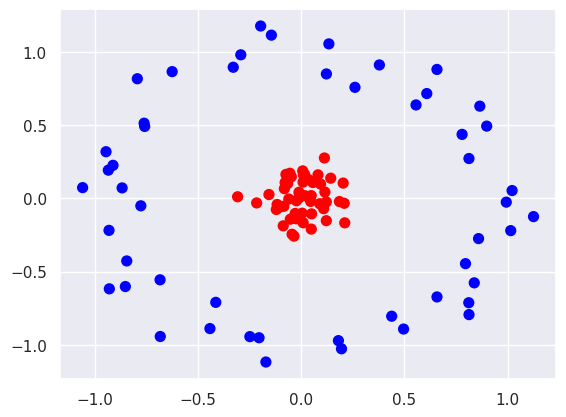

In [16]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [19]:
classifier.score(X_test, y_test)

0.4

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

<ipython-input-21-db75570b4388>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


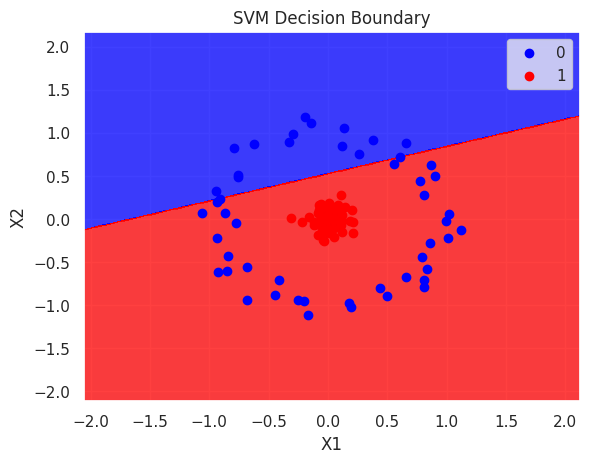

In [21]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

plot_decision_boundary(X, y, classifier)

In [22]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

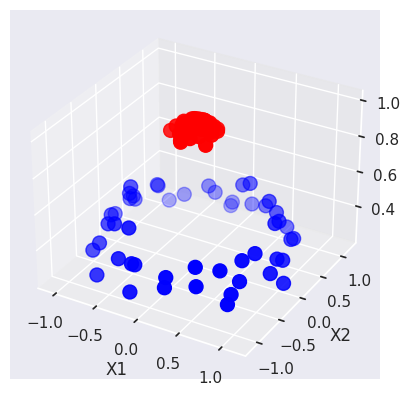

In [23]:
plot_3d_plot(X,y)

In [24]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-21-db75570b4388>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


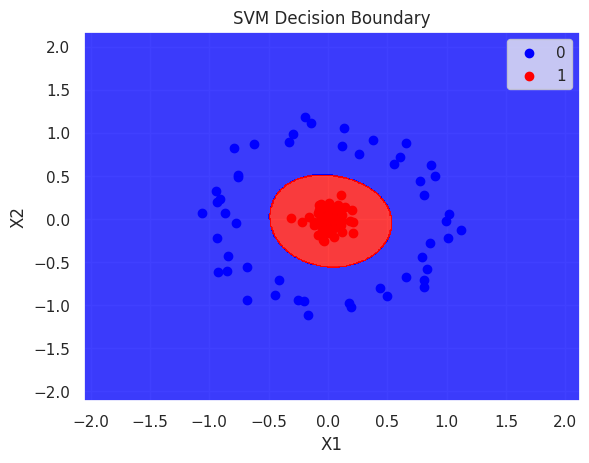

In [26]:
plot_decision_boundary(X, y, rbf_classifier)

In [ ]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
plot_decision_boundary(X, y, poly_classifier)

In [27]:
X

array([[-0.91170348,  0.22623429],
       [-0.08726862, -0.18685899],
       [-0.29282888,  0.98074393],
       [ 0.04544892, -0.02027433],
       [ 0.81250146, -0.79300666],
       [-0.79402882,  0.81736121],
       [ 0.12171205,  0.8501282 ],
       [ 0.10842585, -0.06977328],
       [ 0.20797927, -0.03284965],
       [ 0.01648746,  0.16361508],
       [ 0.01014643,  0.16200103],
       [ 0.04817361,  0.01936881],
       [-0.03535267, -0.25727718],
       [-0.06583103,  0.10199422],
       [ 0.81132096, -0.7118097 ],
       [-0.01108071,  0.04223743],
       [ 0.20293341,  0.10505229],
       [ 0.05625922,  0.10878858],
       [-0.0293897 , -0.10235972],
       [-0.04445383, -0.2443036 ],
       [ 0.81214814,  0.27265321],
       [ 0.19483153, -1.0262882 ],
       [ 0.12140632, -0.15171721],
       [-0.08178497,  0.06690259],
       [ 0.18474263, -0.02108638],
       [-0.30828658,  0.01150794],
       [ 1.124906  , -0.12386994],
       [ 0.01774731,  0.0186727 ],
       [ 0.60796091,

In [28]:
np.exp(-(X**2)).sum(1)

array([1.38563071, 1.95809937, 1.30000669, 1.99752556, 1.04996889,
       1.04502761, 1.47072644, 1.98345619, 1.95658828, 1.97331344,
       1.97399411, 1.99730691, 1.93470254, 1.98532675, 1.12025764,
       1.99809482, 1.94867918, 1.98507471, 1.9887138 , 1.94008775,
       1.44542229, 1.3115483 , 1.96261339, 1.98886758, 1.96600148,
       1.90920357, 1.26689596, 1.99933647, 1.28974631, 1.34537419,
       1.2765961 , 1.35069774, 1.38098637, 1.34940425, 1.91395222,
       1.99983481, 1.98994297, 1.97508831, 1.97985592, 1.92929159,
       1.35789542, 1.3738823 , 1.23397122, 1.54428236, 1.37093448,
       1.9822043 , 1.32039163, 1.26774468, 1.21315676, 1.14889194,
       1.31065244, 1.96780099, 1.34786598, 1.98215339, 1.3639413 ,
       1.35144101, 1.98480731, 1.44726494, 1.96510392, 1.97265433,
       1.9759487 , 1.31214075, 1.97738484, 1.98169609, 1.25856701,
       1.28541718, 1.30224167, 1.98651279, 1.40611902, 1.99078167,
       1.49687163, 1.96784321, 1.96793082, 1.03886889, 1.98100

In [29]:
X_new=np.exp(-(X**2))

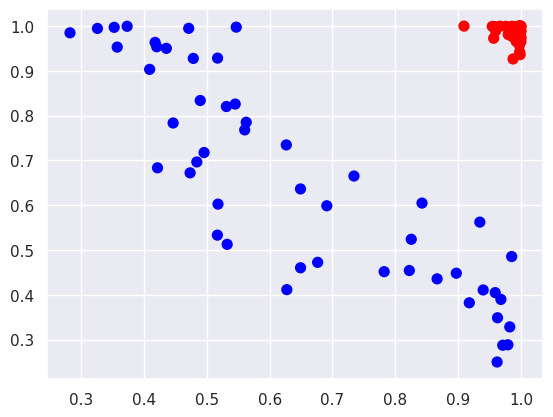

In [30]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')